In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("House_Price_Data.csv")
x_test = pd.read_csv("train.csv")
y_test = pd.read_csv("test.csv")
data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
data["BHK_OR_RK"].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [7]:
data["ADDRESS"].value_counts()

Zirakpur,Chandigarh                   509
Whitefield,Bangalore                  230
Raj Nagar Extension,Ghaziabad         215
Sector-137 Noida,Noida                139
New Town,Kolkata                      131
                                     ... 
Ambika Township,Jivarajpark,Rajkot      1
Cheranalloor,Kochi                      1
Baba Nagar,Bangalore                    1
Barra Devi Naubasta road,Kanpur         1
E3-108, Lake View Recidency,,Vapi       1
Name: ADDRESS, Length: 6899, dtype: int64

In [8]:
data['ADDRESS'] = data['ADDRESS'].str.split(',').apply(lambda x: x[-1])
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,Agra,27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,Vapi,39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,Jaipur,26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,Chennai,12.900150,80.227910,67.0


In [9]:
tier_1 = ["Ahmedabad", "Bengaluru", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Mumbai", "Pune"]
tier_2 = ["Agra", "Ajmer", "Aligarh", "Amravati", "Amritsar", "Asansol", "Aurangabad", "Bareilly", "Belgaum", "Bhavnagar", "Bhiwandi", "Bhopal", "Bhubaneswar","Bikaner", "Bilaspur", "Bokaro Steel City","Chandigarh", "Coimbatore", "Cuttack"," Dehradun","Dhanbad", "Bhilai","Durgapur", "Erode", "Faridabad", "Firozabad", "Ghaziabad","Gorakhpur", "Gulbarga", "Guntur", "Gwalior", "Gurugram", "Guwahati", "Hamirpur", "Hubli–Dharwad", "Indore", "Jabalpur", "Jaipur", "Jalandhar", "Jalgaon", "Jammu", "Jamnagar", "Jamshedpur", "Jhansi", "Jodhpur","Navi Mumbai" ,"Kakinada", "Kannur"," Kanpur", "Karnal", "Kochi"," Kolhapur", "Kollam", "Kozhikode", "Kurnool", "Ludhiana","Lucknow","Madurai", "Malappuram"," Mathura", "Mangalore", "Meerut", "Moradabad", "Mysore", "Nagpur"," Nanded"," Nashik", "Nellore","Navi Mumbai","Noid", "Patna", "Puducherry", "Purulia", "Prayagraj", "Raipur","Rajkot", "Rajamahendravaram"," Ranchi", "Rourkela", "Ratlam", "Salem", "Sangli", "Shimla", "Siliguri"," Solapur", "Srinagar", "Surat", "Thanjavur", "Thiruvananthapuram", "Thrissur", "Tiruchirappalli", "Tirunelveli", "Tiruvannamalai", "Ujjain", "Vijayapura", "Vadodara", "Varanasi", "Vasai-Virar City", "Vijayawada", "Visakhapatnam", "Vellore", "Warangal"]

def mapping_city(city):

    if city in tier_1:
        return 0

    elif city in tier_2:
        return 1
        
    else:
        return 2

data['City_Tier'] = data['ADDRESS'].apply(mapping_city)
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),City_Tier
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0,2
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0,1
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0,2
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5,1
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,Agra,27.140626,78.043277,45.0,1
29447,Owner,0,0,2,BHK,769.230769,1,1,Vapi,39.945409,-86.150721,16.0,2
29448,Dealer,0,0,2,BHK,1022.641509,1,1,Jaipur,26.928785,75.828002,27.1,1
29449,Owner,0,0,2,BHK,927.079009,1,1,Chennai,12.900150,80.227910,67.0,0


<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

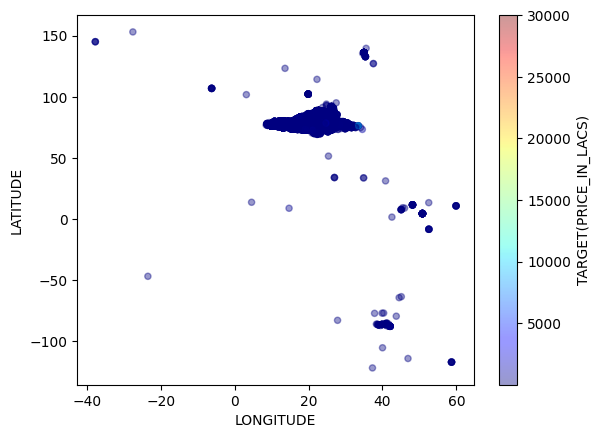

In [10]:
data.plot(kind='scatter',x='LONGITUDE',y='LATITUDE',alpha=0.4,c="TARGET(PRICE_IN_LACS)",cmap=plt.get_cmap("jet"),colorbar=True)

In [11]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [ ]:
data_len = len(data)
for i in range(0,data_len):
    Circle(
        location=[data.iloc[i]['LONGITUDE'], data.iloc[i]['LATITUDE']],
        radius=100,
        color='blue').add_to(map)

map

In [17]:
corr_data = data.corr()
corr_data["TARGET(PRICE_IN_LACS)"].sort_values(ascending=False)

TARGET(PRICE_IN_LACS)    1.000000
SQUARE_FT                0.402685
BHK_NO.                  0.112283
RERA                     0.067636
UNDER_CONSTRUCTION       0.055399
City_Tier                0.023339
LATITUDE                -0.017254
LONGITUDE               -0.031112
READY_TO_MOVE           -0.055399
RESALE                  -0.207378
Name: TARGET(PRICE_IN_LACS), dtype: float64

array([[<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='TARGET(PRICE_IN_LACS)'>,
        <AxesSubplot:xlabel='SQUARE_FT', ylabel='TARGET(PRICE_IN_LACS)'>,
        <AxesSubplot:xlabel='BHK_NO.', ylabel='TARGET(PRICE_IN_LACS)'>],
       [<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>,
        <AxesSubplot:xlabel='SQUARE_FT', ylabel='SQUARE_FT'>,
        <AxesSubplot:xlabel='BHK_NO.', ylabel='SQUARE_FT'>],
       [<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='BHK_NO.'>,
        <AxesSubplot:xlabel='SQUARE_FT', ylabel='BHK_NO.'>,
        <AxesSubplot:xlabel='BHK_NO.', ylabel='BHK_NO.'>]], dtype=object)

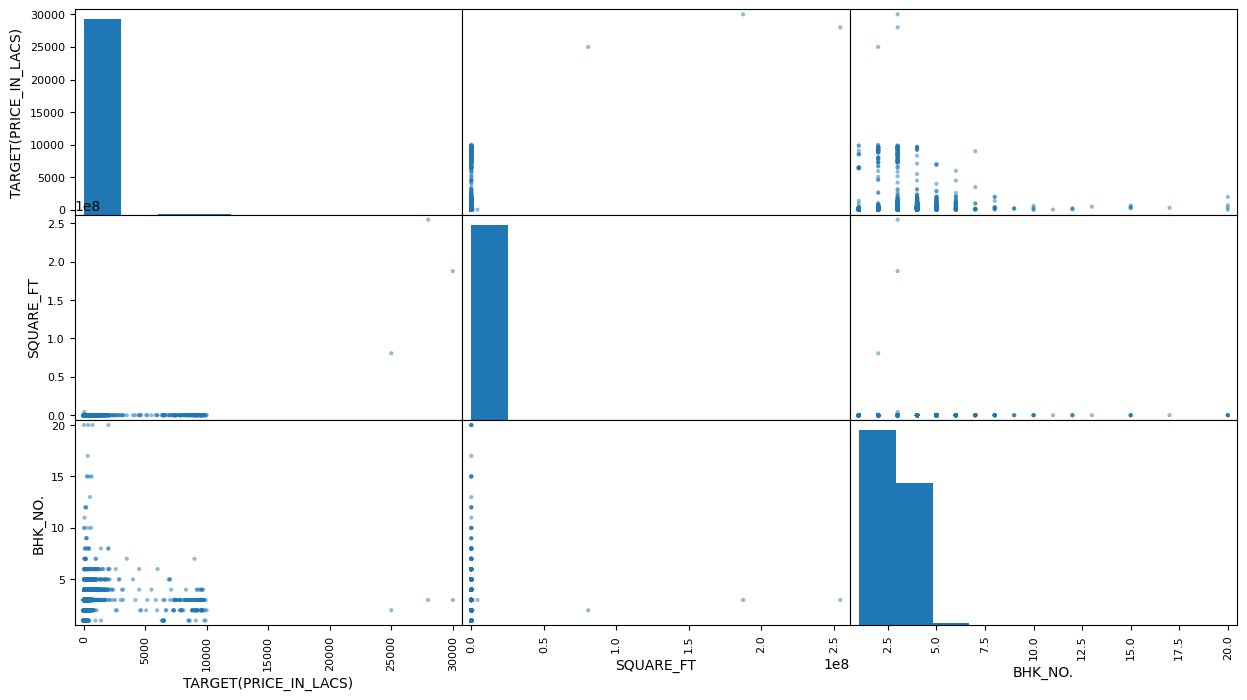

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["TARGET(PRICE_IN_LACS)", "SQUARE_FT", "BHK_NO."]
scatter_matrix(data[attributes], figsize=(15, 8))

In [19]:
x_train = data.drop(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'TARGET(PRICE_IN_LACS)', "City_Tier"], axis=1)
y_train = data['TARGET(PRICE_IN_LACS)']

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [21]:
print(lm.intercept_)

424.6069144314453


In [22]:
lm.coef_
pd.DataFrame(lm.coef_, x_train.columns, columns=['Coeff'])

,Coeff
UNDER_CONSTRUCTION,-15.804951
RERA,26.423302
BHK_NO.,83.909795
SQUARE_FT,0.000139
READY_TO_MOVE,15.804951
RESALE,-541.881072


In [23]:
common_columns = ['POSTED_BY', 'BHK_OR_RK', 'ADDRESS', 'LATITUDE', 'LONGITUDE']
x_test = x_test.drop(columns=[col for col in common_columns if col in x_test.columns], axis=1)

In [24]:
x_test = x_test[x_train.columns]
x_test

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE
0,0,0,2,1300.236407,1,1
1,0,0,2,1275.000000,1,1
2,0,0,2,933.159722,1,1
3,0,1,2,929.921143,1,1
4,1,0,2,999.009247,0,1
...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1
29447,0,0,2,769.230769,1,1
29448,0,0,2,1022.641509,1,1
29449,0,0,2,927.079009,1,1


In [25]:
print(x_test.shape)
print(y_test.shape)


(29451, 6)
(68720, 11)


In [26]:
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
print(len(x_test), len(y_test))

29451 68720


In [27]:
predictions = lm.predict(x_test) 
print(len(y_test), len(predictions)) 

68720 29451


In [28]:
predictions = predictions[:len(y_test)]

In [29]:
print("First few rows of x_test:")
print(x_test.head())

print("First few rows of y_test:")
print(y_test.head())

First few rows of x_test:
   UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  READY_TO_MOVE  RESALE
0                   0     0        2  1300.236407              1       1
1                   0     0        2  1275.000000              1       1
2                   0     0        2   933.159722              1       1
3                   0     1        2   929.921143              1       1
4                   1     0        2   999.009247              0       1
First few rows of y_test:
  POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        1       BHK   545.171340   
1    Dealer                   1     1        2       BHK   800.000000   
2    Dealer                   0     0        2       BHK  1257.096513   
3    Dealer                   0     0        3       BHK  1400.329489   
4     Owner                   0     0        1       BHK   430.477830   

   READY_TO_MOVE  RESALE             ADDRESS  LONGITUDE   LATITUDE  
0 

In [30]:
print("Missing values in x_test:")
print(x_test.isnull().sum())

print("Missing values in y_test:")
print(y_test.isnull().sum())


Missing values in x_test:
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
dtype: int64
Missing values in y_test:
POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64


In [31]:
x_test = x_test.dropna()
y_test = y_test.dropna()

x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [32]:
predictions = lm.predict(x_test)

print("Length of y_test:", len(y_test))
print("Length of predictions:", len(predictions))

if len(predictions) != len(y_test):
    predictions = predictions[:len(y_test)]
    print(f"Truncated predictions to match y_test length: {len(predictions)}")


Length of y_test: 68720
Length of predictions: 29451
Truncated predictions to match y_test length: 29451


In [34]:
from sklearn.model_selection import train_test_split

# Ensure consistent splitting for x and y
x_train, x_test, y_train, y_test = train_test_split(data.drop(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'TARGET(PRICE_IN_LACS)', 'City_Tier'], axis=1),
                                                    data['TARGET(PRICE_IN_LACS)'], test_size=0.2, random_state=42)


In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = {
    'SQUARE_FT': [1000, 1500, 2000, 2500, 3000],
    'BHK_NO.': [2, 3, 3, 4, 4],
    'City_Tier': [0, 1, 0, 1, 2],
    'READY_TO_MOVE': [1, 1, 0, 1, 0],
    'RERA': [1, 1, 0, 1, 0],
    'RESALE': [0, 1, 1, 0, 0],
    'UNDER_CONSTRUCTION': [0, 0, 1, 0, 1],
    'Price': [30, 40, 50, 60, 70]
}

df = pd.DataFrame(data)

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)

def preprocess_user_input(size, bhk, city, model, feature_columns):
    
    tier_1 = ["Ahmedabad", "Bengaluru", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Mumbai", "Pune"]
    tier_2 = ["Agra", "Ajmer", "Aligarh", "Amravati", "Amritsar", "Asansol", "Aurangabad", "Bareilly", "Belgaum", "Bhavnagar", "Bhiwandi", "Bhopal", "Bhubaneswar", "Bikaner", "Bilaspur", "Bokaro Steel City", "Chandigarh", "Coimbatore", "Cuttack", "Dehradun", "Dhanbad", "Bhilai", "Durgapur", "Erode", "Faridabad", "Firozabad", "Ghaziabad", "Gorakhpur", "Gulbarga", "Guntur", "Gwalior", "Gurugram", "Guwahati", "Hamirpur", "Hubli–Dharwad", "Indore", "Jabalpur", "Jaipur", "Jalandhar", "Jalgaon", "Jammu", "Jamnagar", "Jamshedpur", "Jhansi", "Jodhpur", "Navi Mumbai", "Kakinada", "Kannur", "Kanpur", "Karnal", "Kochi", "Kolhapur", "Kollam", "Kozhikode", "Kurnool", "Ludhiana", "Lucknow", "Madurai", "Malappuram", "Mathura", "Mangalore", "Meerut", "Moradabad", "Mysore", "Nagpur", "Nanded", "Nashik", "Nellore", "Navi Mumbai", "Noid", "Patna", "Puducherry", "Purulia", "Prayagraj", "Raipur", "Rajkot", "Rajamahendravaram", "Ranchi", "Rourkela", "Ratlam", "Salem", "Sangli", "Shimla", "Siliguri", "Solapur", "Srinagar", "Surat", "Thanjavur", "Thiruvananthapuram", "Thrissur", "Tiruchirappalli", "Tirunelveli", "Tiruvannamalai", "Ujjain", "Vijayapura", "Vadodara", "Varanasi", "Vasai-Virar City", "Vijayawada", "Visakhapatnam", "Vellore", "Warangal"]

    def mapping_city(city):
        if city in tier_1:
            return 0
        elif city in tier_2:
            return 1
        else:
            return 2

    city_tier = mapping_city(city)

    input_data = {
        "SQUARE_FT": size,
        "BHK_NO.": bhk,
        "City_Tier": city_tier,
        "READY_TO_MOVE": 0,           
        "RERA": 0,                   
        "RESALE": 0,                 
        "UNDER_CONSTRUCTION": 0      
    }

    input_df = pd.DataFrame([input_data])

    input_df = input_df[feature_columns]

    prediction = model.predict(input_df)

    return prediction[0]

feature_columns = ["SQUARE_FT", "BHK_NO.", "City_Tier", "READY_TO_MOVE", "RERA", "RESALE", "UNDER_CONSTRUCTION"]

size = float(input("Enter the size of the house in square feet: "))
bhk = int(input("Enter the number of bedrooms (BHK): "))
city = input("Enter the city name: ")

predicted_price = preprocess_user_input(size, bhk, city, lm, feature_columns)

print(f"The predicted price of the house is: ₹{predicted_price * 100000:.2f} INR (in Lakhs)")


Enter the size of the house in square feet: 1300
Enter the number of bedrooms (BHK): 3
Enter the city name: Chennai
The predicted price of the house is: ₹3600002.06 INR (in Lakhs)


In [38]:
import os
import joblib

model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'models/model1.pkl')

os.makedirs('models1', exist_ok=True)

joblib.dump(model, 'models1/model1.pkl')

['models1/model1.pkl']